<a href="https://colab.research.google.com/github/Javlonbek-Math/ML-DL_projects/blob/main/The_tendency_of_the_Chinese_economy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***`Polynomial Regression`***

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv"

df = pd.read_csv(url)

#***`Train_test_set`***

In [6]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(df, test_size=0.1, random_state=42)

# ***`Normalization`***

In [7]:
X_train = np.asanyarray(train_set[['Year']]/df.Year.max())
y_train = np.asanyarray(train_set[['Value']]/df.Value.max())

In [18]:
X_test = np.asanyarray(test_set[['Year']]/df.Year.max())
y_test = np.asanyarray(test_set[['Value']]/df.Value.max())

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


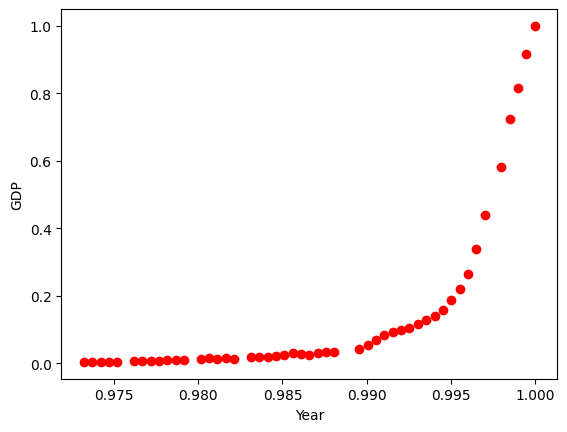

In [16]:
plt.plot(X_train,y_train,'ro')
x_label = 'Year'
y_label = 'GDP'
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.show()

#***`Pipeline`***

In [33]:
polynomial_regression=Pipeline([
    ('poly_features',PolynomialFeatures(degree=5, include_bias=False)),
    ('model',LinearRegression())
    ])
polynomial_regression.fit(X_train,y_train)

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=5, include_bias=False)),
                ('model', LinearRegression())])

In [39]:
y_predict=polynomial_regression.predict(X_test)

#***`Model Evaluation `***

In [41]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae=mean_absolute_error(y_test,y_predict)
mse=mean_squared_error(y_test,y_predict)
print('MAE:',mae)
print('MSE:',mse)

MAE: 0.0028780162289744372
MSE: 1.0448466336898153e-05
